# EDA

This file is used for exploratory data analysis with some datasets. When you use datasets from Kaggle, it is better to use kaggle API to download them on CLI. If you are unfamiliar with Kaggle API, please read "how_to_use_kaggle_api.ipynb" beforehand.

There were two waves for this survey. The first wave had been conducted in August-September 2020, whereas the second wave was March-April 2021.

In [10]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. <a href = "https://www.kaggle.com/datasets/melodyyiphoiching/remote-working-survey?select=2020_rws.csv">Remote Working Survey </a>

In [1]:
!kaggle datasets download --unzip -p dataset/ melodyyiphoiching/remote-working-survey


  0%|          | 0.00/373k [00:00<?, ?B/s]
100%|██████████| 373k/373k [00:00<00:00, 771kB/s]
100%|██████████| 373k/373k [00:00<00:00, 766kB/s]


In [11]:
# read the dataset
rws_2020 = pd.read_csv('dataset\\2020_rws.csv',encoding = 'cp1252')
rws_2021 = pd.read_csv('dataset\\2021_rws.csv',encoding = 'cp1252')

There are about 1,500 records in each, but the number of columns are not same. The survey in 2020 had 73 questions whereas, the one in 2021 had 109 questions. Did they include different questionnaires?

In [12]:
print('rws_2020:{} , rws_2021:{}'.format(rws_2020.shape,rws_2021.shape))

rws_2020:(1507, 73) , rws_2021:(1512, 109)


Yes they did. The common columns are few, and most of them are different. Some of columns are written in different words but may be same meaning such as 'Metro / Regional' and 'Metro or Regional'

In [70]:
rws_2020_cols = [c.strip() for c in rws_2020.columns]
rws_2021_cols = [c.strip() for c in rws_2021.columns]

rws_2020 = rws_2020.rename(columns = dict(zip(rws_2020.columns,rws_2020_cols)))
rws_2021 = rws_2021.rename(columns = dict(zip(rws_2021.columns,rws_2021_cols)))
symmetric_diff = len(list(set(rws_2020_cols) ^ set(rws_2021_cols))) # symmetric difference
interaction = len(list(set(rws_2020_cols) & set(rws_2021_cols))) # interaction
print('symmetric difference {} , interaction {}'.format(symmetric_diff,interaction))

symmetric difference 168 , interaction 7


In [43]:
questions_2020 = pd.DataFrame(rws_2020_cols[1:], index = [i for i in range(len(rws_2020_cols[1:]))],columns = ['question'])
questions_2021 = pd.DataFrame(rws_2021_cols[1:], index = [i for i in range(len(rws_2021_cols[1:]))],columns = ['question'])

As there are tons of questions, I tried to classify them into some categories. 

In [285]:
questions = {
    0: {
        'original IDs': ([0], [0]),
        'question': 'What year were you born?',
        'type':'biology'
        },
    1: {
        'original IDs': ([1], [1]),
        'question': 'What is your gender?',
        'type':'biology'
        },
    2: {
        'original IDs': ([2], [3]),
        'question': 'industry',
        'type':'biology'
        },
    3: {
        'original IDs': ([3],[]),
        'question': 'industry (Detailed)',
        'type':'biology'
        },
    4: {
        'original IDs': ([4], [4]),
        'question': 'current occupation?',
        'type':'biology'
        },
    5: {
        'original IDs': ([5],[]),
        'question': 'current occupation? (Detailed)',
        'type':'biology'
        },
    6: {
        'original IDs': ([6], [5]),
        'question': 'number of employees',
        'type':'biology'
        },
    7: {
        'original IDs': ([7], [95]),
        'question': 'Do you manage people?',
        'type':'biology'
        },
    8: {
        'original IDs': ([8], [6]),
        'question': 'household',
        'type':'biology'
        },
    9: {
        'original IDs': ([9], [2]),
        'question': 'length of current job',
        'type':'biology'
        },
    10: {
        'original IDs': ([10],[7]),
        'question': 'Metro or Regional',
        'type':'biology'
        },
    11: {
        'original IDs': ([11,19],[10,8]),
        'question': 'how much of your time did you spend remote working?',
        'type':'experience'
        },
    12: {
        'original IDs': ([12,20], [24]),
        'question': 'My organisation encouraged people to work remotely',
        'type':'top management support/organization policy'
        },
    13: {
         'original IDs': ([13,21], [25]),
         'question': 'My organisation was well prepared for me to work remotely',
         'type':'top management support/organization policy'
         },
    14: {
        'original IDs': ([14,22], [26]),
        'question': 'It was common for people in my organisation to work remotely',
        'type':'acceptance'
        },
    15: {
        'original IDs': ([15,23], [27]),
        'question': 'It was easy to get permission to work remotely',
        'type':'acceptance'
        },
    16: {
        'original IDs': ([16,24], [28]),
        'question': 'I could easily collaborate with colleagues when working remotely',
        'type':'team'
        },
    17: {
        'original IDs': ([17,25],[]),
        'question': 'I would recommend remote working to others',
        'type':'preference'
        },
    18: {
        'original IDs': ([18,26,27], [9,11,12]),
        'question': 'How much of your time would you have preferred to work remotely?',
        'type':'preference'
        },
    # 19: {
    #     'original IDs': ([19], [8]),
    #     'question': 'how much of your time did you spend remote working?',
    #     'type':'experience'
    #     },
    20: {
        'original IDs': ([28], [33]),
        'question': 'My employer would encourage more remote working',
        'type':'top management support/organization policy'
        },
    21: {
        'original IDs': ([29], [34]),
        'question': 'My employer would make changes to support remote working',
        'type':'top management support/organization policy'
        },
    22: {
        'original IDs': ([30], [35]),
        'question': 'I would have more choice about whether I work remotely',
        'type':'acceptance'
        },
    23: {
        'original IDs': ([31], [106]),
        'question': 'compare your productivity when you work remotely to when you work at your employer’s workplace',
        'type':'productivity'
        },
    24: {
        'original IDs': ([32,36], [36,41]),
        'question': "how many hours would you spend preparing for work and commuting?",
        'type':'experience'
        },
    25: {
        'original IDs': ([33,37], [37,42]),
        'question': "how many hours would you spend working?",
        'type':'experience'
        },
    26: {
        'original IDs': ([34,38], [39,44]),
        'question': "how many hours would you spend doing personal and family time?",
        'type':'experience'
        },
    27: {
        'original IDs': ([35,39], [38,43]),
        'question': "how many hours would you spend caring and domestic responsibilities?",
        'type':'experience'
        },
    28: {
        'original IDs': ([], [40]),
        'question': "how many hours would you spend sleeping?",
        'type':'experience'
        },
    29: {
        'original IDs': ([40,41], [49,54,52,53,51,48]),
        'question': 'the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities',
        'type': 'flexibility'
        },
    30: {
        'original IDs': ([42,43], [49,54,52,56,59]),
        'question': 'the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; Cyber security ; Lack of motivation ; Lack of motivation',
        'type': 'flexibility'
        },
    31: {
        'original IDs': ([44,45], [49,50,54,58]),
        'question': "the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely",
        'type': 'flexibility'
        },
    32: {
       'original IDs': ([46,47,48,49], [49,54,62,61,60,53,51,48,56,59]),
       'question': 'the most/least significant barrier of WFH - Connectivity (internet connection) ; Feeling left out and/or isolated ; Poor management ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working',
       'type': 'flexibility'
        },
    33: {
        'original IDs': ([50,51,52,53], [50,53,51,48,58,57,53,51,48,62,61,60]),
        'question': 'the most/least significant barrier of WFH - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; Cyber security ; Lack of motivation ; Lack of motivation',
        'type': 'flexibility'
        },  
    34: {
        'original IDs': ([54,55,56,57], [50,56,59,58,57,56,59,62,61,60]),
        'question': "the most/least significant barrier of WFH - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; My organisation's software and systems ; My workspace (e.g. suitable chair, lighting, noise levels, facilities) ; I have tasks that can't be done remotely",
        'type': 'flexibility'
        },  
    35: {
        'original IDs': ([58,59], [50,58,57,62,61,60]),
        'question': 'the most significant barrier of WFH - IT equipment (computer, printer, etc.) ; Difficulty collaborating remotely ; Caring responsibilities ; Lack of remote working skills ; My living situation (e.g. location, home size, who I live with) ; Management discourages remote working',
        'type': 'flexibility'
        }, 
    36: {
        'original IDs': ([],[55]),
        'question': 'Have the following barriers to remote working improved or worsened for you over the past 6 months?   - Extra costs',
        'type': 'flexibility'
        },
    37: {
        'original IDs': ([],[63]),
        'question': 'Have the following barriers to remote working improved or worsened for you over the past 6 months?   - My health and safety when working remotely',
        'type': 'flexibility'
        },
    38: {
        'original IDs': ([60,61],[]),
        'question': 'the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities',
        'type':'effect'
        },
    39: {
        'original IDs': ([62,63],[]),
        'question': 'the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing',
        'type':'effect'
        },
    40: {
        'original IDs': ([64,65],[]),
        'question': 'the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction',
        'type':'effect'
        },
    41: {
        'original IDs': ([66,67],[]),
        'question': 'the best aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing',
        'type':'effect'
        },
    42: {
        'original IDs': ([68,69],[]),
        'question': 'the best aspect of remote working for you - The number of hours  I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction',
        'type':'effect'
        },
    43: {
        'original IDs': ([70,71],[]),
        'question': 'the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction',
        'type':'effect'
        },
    44: {
        'original IDs': ([],[13]),
        'question': 'Has your employer changed or updated their policy on remote work since COVID-19?',
        'type':'top management support/organization policy'
        },
    45: {
        'original IDs': ([],[14]),
        'question': 'have you ever worked part of your day remotely, and part of it at your employer’s workplace?',
        'type':'experience'
        },
    46: {
        'original IDs': ([],[15]),
        'question': 'How often do you work this way(worked part of your day remotely, and part of it at your employer’s workplace)?',
        'type':'experience'
        },
    47: {
        'original IDs': ([],[16]),
        'question': 'How often would you like to work this way?',
        'type':'preference'
        },
    48: {
        'original IDs': ([],[17]),
        'question': 'Does your employer have a policy that workers must be at the employer’s workplace some of the time?',
        'type':'top management support/organization policy'
        },
    49: {
        'original IDs': ([],[18]),
        'question': 'How much of your work time does your employer’s policy require you to be at their workplace?',
        'type':'top management support/organization policy'
        },
    50: {
        'original IDs': ([],[19,20,21,22]),
        'question': 'your employer’s policy on remote working',
        'type':'top management support/organization policy'
        },
    51: {
        'original IDs': ([],[29,30]),
        'question': 'remote working in the last 6 months',
        'type':'experience'
        },
    52: {
        'original IDs': ([],[31]),
        'question': 'Do you think remote working is a positive or a negative for your employer?',
        'type':'acceptance'
        },
    53: {
        'original IDs': ([],[32]),
        'question': 'Who is most supportive of remote working in your organisation?',
        'type':'top management support/organization policy'
        }, 
    54: {
        'original IDs': ([],[46]),
        'question': 'Imagine your employer offered you the option to work remotely whenever you chose, in return for negotiating a pay cut that you both agree on.  Would you be interested in negotiating?',
        'type':'preference'
        },
    55: {
        'original IDs': ([],[47]),
        'question': 'What is the biggest pay cut you would accept?   Please give your answer as a percentage.',
        'type':'preference'
        },
    56: {
        'original IDs': ([],[64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91]),
        'question': 'Think about when you worked at your employer’s workplace and some of your colleagues were working remotely. What were the biggest/smallest barriers of working this way?',
        'type':'flexibility'
        },
    57: {
        'original IDs': ([],[92]),
        'question':'On days when I work remotely I feel better',
        'type':'effect'
        },
    58: {
        'original IDs': ([],[93]),
        'question': 'On days when I work remotely I am more active',
        'type':'effect'
        },
    59: {
        'original IDs': ([],[94]),
        'question': 'I feel better on days when I see my colleagues in person',
        'type':'effect'
        },
    60: {
        'original IDs': ([],[96]),
        'question': 'Do employees you manage ever work remotely?',
        'type':'acceptance'
        },
    61: {
        'original IDs': ([],[97]),
        'question': 'I have discretion to offer or deny remote work to employees I manage',
        'type':'top management support/organization policy'
        },
    62: {
        'original IDs': ([],[98]),
        'question': 'Offering remote work helps me retain employees',
        'type':'effect'
        },
    63: {
        'original IDs': ([],[99]),
        'question': 'Offering remote work helps me to recruit employees',
        'type':'effect'
        },
    64: {
        'original IDs': ([],[100]),
        'question': 'My team works well together when they work remotely',
        'type':'effect'
        },
    65: {
        'original IDs': ([],[101]),
        'question': 'I find it easy to manage employees remotely (e.g. tasking and monitoring progress)',
        'type':'effect'
        },
    66: {
        'original IDs': ([],[102]),
        'question': 'I find it easy to manage poor performers remotely',
        'type':'effect'
        },
    67: {
        'original IDs': ([],[103]),
        'question': 'I feel well-prepared to manage employees remotely',
        'type':'effect'
        },
    68: {
        'original IDs': ([],[104]),
        'question': 'Managing people remotely makes me more focused on results',
        'type':'effect'
        },
    69: {
        'original IDs': ([],[105]),
        'question': 'I find it easy to contact my employees when they work remotely',
        'type':'effect'
        },
    70: {
        'original IDs': ([],[107]),
        'question': 'Roughly how productive are the employees you manage, each hour, when they work remotely?',
        'type':'productivity'
        }
        }

In [258]:
# rws_2020

class Q:

    def __init__(self,questions,questions_2020,questions_2021,df_2020,df_2021):

        self.id = ['Response ID']

        self.questions = questions
        
        self.questions_2020 = questions_2020
        self.questions_2021 = questions_2021

        self.df_2020 = df_2020
        self.df_2021 = df_2021

    def get_q_info(self,search_qid):
        self.q_info = self.questions[search_qid]
        self.qid_2020 = self.q_info['original IDs'][0] # list
        self.qid_2021 = self.q_info['original IDs'][1] # list
        self.q_text = self.q_info['question']
        self.q_type = self.q_info['type']
        print(self.q_info)

        return self.q_info

    def get_questions(self):

        target_questions_2020 = self.questions_2020[self.questions_2020.index.isin(self.qid_2020)]['question'].values.tolist()
        target_questions_2021 = self.questions_2021[self.questions_2021.index.isin(self.qid_2021)]['question'].values.tolist()

        return [target_questions_2020, target_questions_2021]
    
    def get_result(self,target_questions):

        self.result_2020 = self.df_2020.loc[:,self.id + target_questions[0]]
        self.result_2021 = self.df_2021.loc[:,self.id + target_questions[1]]

        return [self.result_2020,self.result_2021]
    
    def get_qid_type(self,q_type):

        qid_list = []

        for qid, q_info in questions.items():
            if q_info['type'] == q_type:
                qid_list.append(qid)

        return qid_list
    
    def unstack_df(self,target_df,new_colnames):
        target_df = target_df.set_index(self.id)
        renamed_df = target_df.rename(columns = dict(zip( target_df.columns, new_colnames)))
        unstacked = renamed_df.unstack()
        new_df = unstacked.reset_index()
        renamed_new_df = new_df.rename(columns = {'level_0':'as_of',0:'original'})
        return renamed_new_df.set_index(self.id)
    
    @staticmethod
    def extract_percentages(responses):
        '''
        Define a function to extract percentages or specific phrases from the list
        '''
        extracted_responses = []
        
        for response in responses:
            if "%" in response:  # Check if the response contains a percentage
                # Extract only the numerical part and the % symbol
                extracted_part = ''.join([char for char in response if char.isdigit() or char == '%'])
                extracted_responses.append(extracted_part)
            else:
                # If no percentage is mentioned, add the whole response
                if 'rarely or never' in response.lower():
                    extracted_responses.append('0%')
                else:
                    extracted_responses.append(response.strip())
        return extracted_responses

    @staticmethod
    def insert_replace_value(df,col,original_text,new_text,new_col):
        df_copied = df.copy()
        new_values = df_copied [col].replace(dict(zip(original_text,new_text))).values
        df_copied .insert(df_copied .shape[1],new_col,new_values)
        return df_copied 

# Experiences

In [286]:
q = Q(questions,questions_2020,questions_2021,rws_2020,rws_2021)
print('The question numbers: {}'.format(q.get_qid_type('experience')))

The question numbers: [11, 24, 25, 26, 27, 28, 45, 46, 51]


# how much of your time did you spend remote working in a year

In [287]:
q_info = q.get_q_info(11)
question_list = q.get_questions()
result_list = q.get_result(question_list)

{'original IDs': ([11, 19], [10, 8]), 'question': 'how much of your time did you spend remote working?', 'type': 'experience'}


In [291]:
experience_q11 = pd.concat([q.unstack_df(result_list[0],['pre-pandemic(2019)','June-August 2020']),q.unstack_df(result_list[1],['October-December 2020','pandemic(2021)'])])

In [292]:
original_text = experience_q11['original'].unique().tolist()
extracted_text =q.extract_percentages(original_text)
experience_q11 = q.insert_replace_value(experience_q11,'original',original_text,extracted_text,'pct')

As you can see, remote work had not been popular pre-pandemic era in NSW. The graph below shows the it was few number of people who had done full remote work in 2019. In contrast, WFH seemed mandatory for those who were able to do so from 2020 to early 2021.

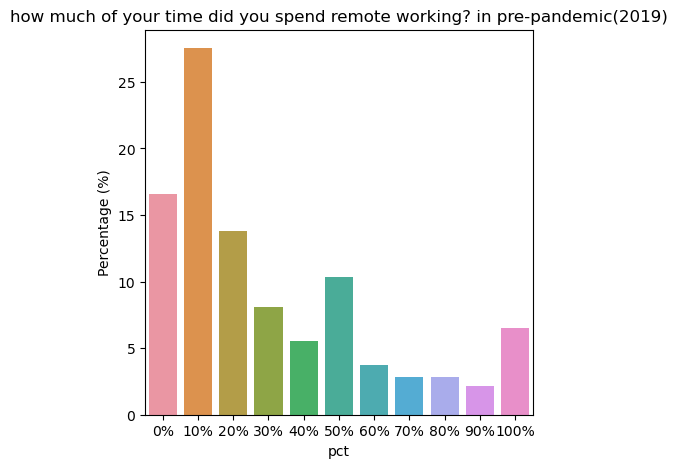

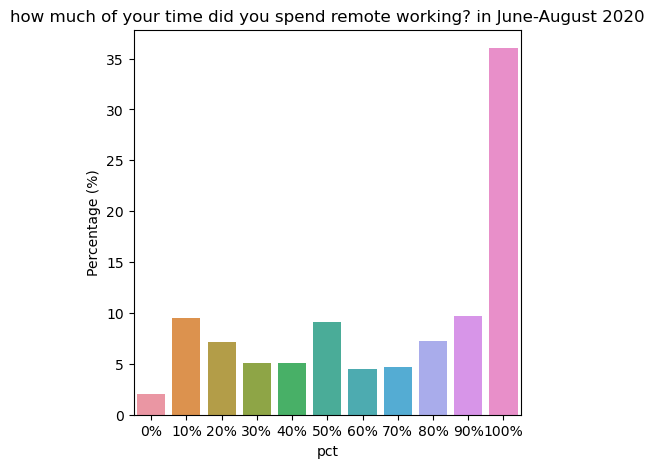

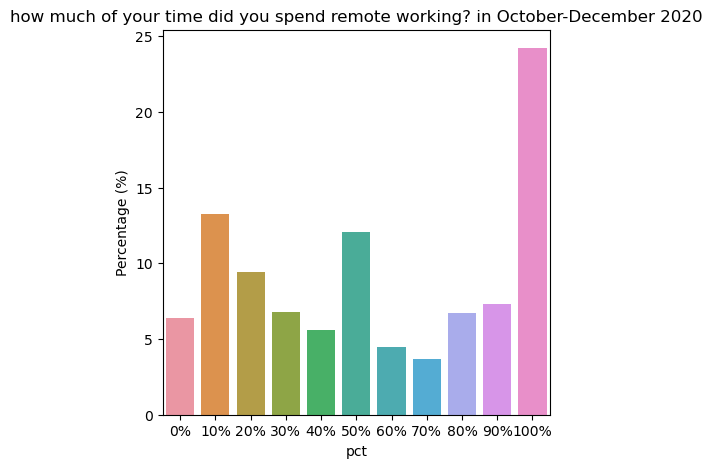

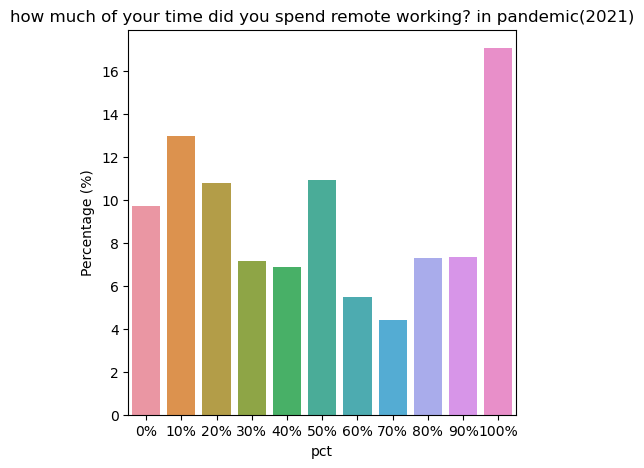

In [296]:
for ao in experience_q11['as_of'].unique():
    category_counts = experience_q11.query('as_of == "{}"'.format(ao))['pct'].value_counts(normalize = True) * 100
    df_percent = category_counts.reset_index()

    plt.figure(figsize = (5,5))
    sns.barplot(x='pct', y='proportion', data=df_percent,order = ['0%','10%','20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%' , '100%'])
    plt.ylabel('Percentage (%)')  
    plt.title('{} in {}'.format(q_info['question'],ao))

# how many hours would you spend preparing for work and commuting?

In [297]:
q_info = q.get_q_info(24)
question_list = q.get_questions()
result_list = q.get_result(question_list)

{'original IDs': ([32, 36], [36, 41]), 'question': 'how many hours would you spend preparing for work and commuting?', 'type': 'experience'}


In [310]:
experience_q24 = pd.concat([q.unstack_df(result_list[0],['at employer"s workplace in 2020','at home in 2020']),q.unstack_df(result_list[1],['at employer"s workplace in 2021','at home in 2021'])])

The boxplot shows it takes more time for work and commuting at employer's workplace than at home, since they needed to commute there. What's interesting is the average of hours in employer's workplace in 2021 became longer compared to the previous year. This could be because those who went to office wanted to complete tasks which could not be done at home, but it was not clearly depicted in this graph.

Text(0.5, 1.0, 'Hours for preparing for work and commuting')

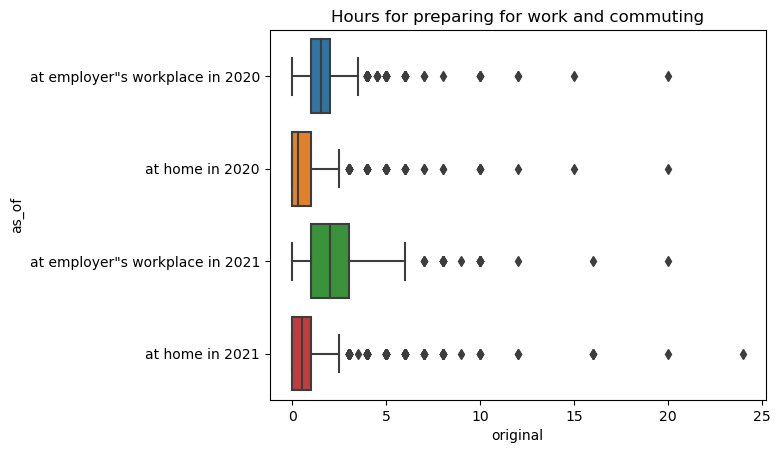

In [311]:
sns.boxplot(experience_q24,y = 'as_of', x = 'original')
plt.title('Hours for preparing for work and commuting')

# how many hours would you spend working?

In [313]:
q_info = q.get_q_info(25)
question_list = q.get_questions()
result_list = q.get_result(question_list)

{'original IDs': ([33, 37], [37, 42]), 'question': 'how many hours would you spend working?', 'type': 'experience'}


In [316]:
experience_q25 = pd.concat([q.unstack_df(result_list[0],['at employer"s workplace in 2020','at home in 2020']),q.unstack_df(result_list[1],['at employer"s workplace in 2021','at home in 2021'])])

There are some outliers but it can be said that the time to prepare for working did not change so much.

Text(0.5, 1.0, 'Hours for preparing for working')

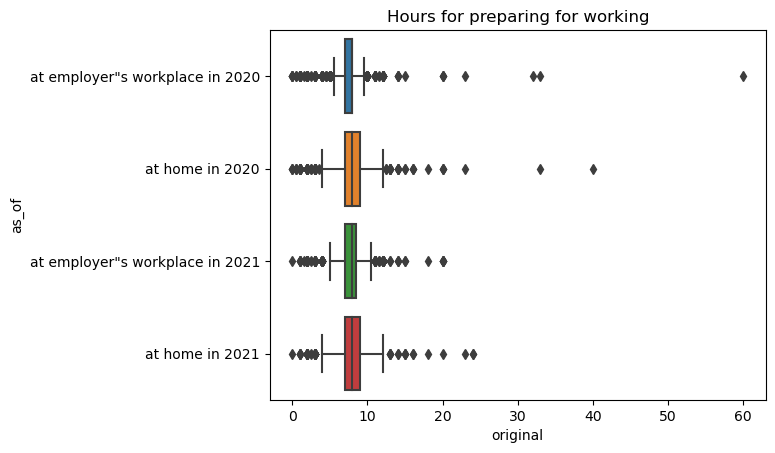

In [317]:
sns.boxplot(experience_q25,y = 'as_of', x = 'original')
plt.title('Hours for preparing for working')